In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import time

#### Funções

In [82]:
def centralizar(train_df, test_df):
    medias = train_df.mean()
    train_centralizado = train_df - medias
    test_centralizado = test_df - medias
    train = np.asarray(train_centralizado)
    test = np.asarray(test_centralizado)
    return train, test 

def decomposicao_svd(df):
    U, S, Vt = np.linalg.svd(df, full_matrices=False)
    return U, S, Vt

def grafico_variabilidade(variabilidade, S):
    plt.plot(range(1, len(variabilidade) + 1), variabilidade, marker='o', markersize=3, markerfacecolor='teal', markeredgecolor='teal', color='darkturquoise')
    plt.xlabel('Número de Valores Singulares')
    plt.ylabel('Variabilidade Acumulada')
    plt.title('Valores Singulares por Variabilidade Acumulada')
    plt.grid(color='lightgray', alpha=0.7)
    plt.show()

def componentes_principais(r, Vt, train, test):
    Vt_reduced = Vt[:r, :]

    P_train = np.dot(train, Vt_reduced.T)
    P_test = np.dot(test, Vt_reduced.T)
    return P_train, P_test

def calculo_rmse(result, y_test):
    diff = (np.array(result) - np.array(y_test)) ** 2

    mean_diff = np.mean(diff)

    rmse = np.sqrt(mean_diff)

    return rmse

def euclidian_distance(x, y):
    len_x = len(x)
    len_y = len(y)
    if (len_x < len_y):
        x.resize(len_y, refcheck=False)
        x[len_x:(len_y-1)] = 0
    elif (len_y < len_x):
        y.resize(len_x, refcheck=False)
        y[len_y:(len_x-1)] = 0
    if (len(x) == len(y)):
        diff = 0
        for index, value_x in enumerate(x):
            diff+=(value_x-y[index])*(value_x-y[index])
        return np.sqrt(diff)
    else:
        print("Não foi possível calcular a distância euclidiana")
        return
    
def knn(X_train, X_test, y_train, y_test):
    start_time = time.time()
    classes_prediction = []
    for test_vector in X_test:
        distances_classes = []
        for index, train_vector in enumerate(X_train):
            dist = euclidian_distance(train_vector, test_vector)
            distances_classes.append((dist, y_train[index]))
        distances_classes.sort()
        classes_prediction.append(distances_classes[0][1])
    end_time = time.time()
    print(f"Tempo de execução: {end_time - start_time:.6f} segundos")
    rmse = calculo_rmse(classes_prediction, y_test)
    print(f"O valor do RMSE é: {rmse}.")
    return classes_prediction, rmse
        

In [59]:
df = pd.read_csv("../knn/sign_mnist_train.csv")
df.drop(df.index[100:], inplace=True)

df.shape

df.to_csv("sign_mnist_experimental.csv")

In [60]:
train, test = train_test_split(df, test_size=0.3)

In [61]:
y_train_arr = np.asarray(train['label'])
y_test_arr = np.asarray(test['label'])

In [62]:
test.drop(columns=['label'], inplace=True)
train.drop(columns=['label'],inplace=True)

In [63]:
train, test = centralizar(train, test)

In [64]:
U, S, Vt = decomposicao_svd(train)

In [65]:
variabilidade = np.cumsum(S**2) / np.sum(S**2)

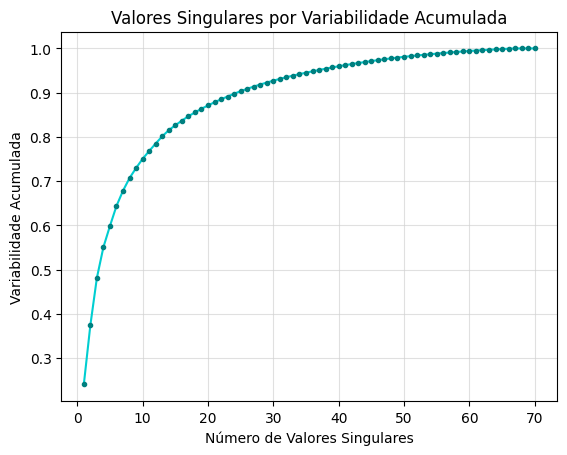

In [66]:
grafico_variabilidade(variabilidade, S)

In [70]:
porcentagem_variabilidade = 0.90

r = np.where(variabilidade >= porcentagem_variabilidade)[0][0] + 1
print(f'Número de valores singulares para atingir {porcentagem_variabilidade*100}% de variabilidade: {r}')

Número de valores singulares para atingir 90.0% de variabilidade: 25


In [77]:
P_train, P_test = componentes_principais(r, Vt, train, test)

In [83]:
result = knn(P_train, P_test, y_train_arr, y_test_arr)

Tempo de execução: 0.016227 segundos
O valor do RMSE é: 9.018499505645789.
